# Load data from tensorboard checkpoint

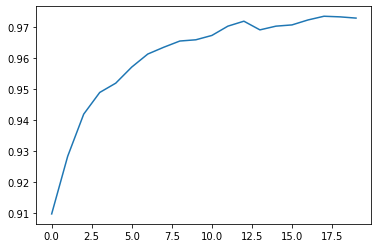

In [11]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import matplotlib.pyplot as plt

# load tensprboard events into a dict
def load_saved_results(results_dir:str)->dict:
    event_acc = EventAccumulator(results_dir)
    event_acc.Reload()
    results_dict = {}
    for tag in event_acc.Tags()['scalars']: # loop over all tags in the log file
        results_dict[tag] = {}
        w_times, results_dict[tag]['step_nums'], results_dict[tag]['vals'] = zip(*event_acc.Scalars(tag))
    return results_dict
results_dir = 'lightning_logs/version_16'
results_dict = load_saved_results(results_dir)

# plot validation accuracy vs epoch 
_ = plt.plot(results_dict["val_acc"]['vals'])